# Genetic Algorithm TSP

In [80]:
from random import randint
import numpy as np
import random
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

## 1. Initialization

In [81]:
#holds the x coord, y coord, and a key for sorting
class cities:
    def __init__(self, x,y, key):
        self.x = x
        self.y = y
        self.key = key

In [82]:
#randomly generates n cities with x and y coords
def makeCities(num):
    cityList = {}
    for i in range(0,num):
        cityList[i] = cities(randint(0,200),randint(0,200),i)
    return cityList

## 2. Evaluation

In [83]:
#distance calc
def distance(city1, city2):
    distancex = np.sqrt((city1.x-city2.x)**2)
    distancey = np.sqrt((city1.y-city2.y)**2)
    return np.sqrt(distancex**2 + distancey**2)

In [84]:
def fitness(key,cityList):
    #assigns a fitness value based on the inverse of the distance between cities
    fitness = {}
    for i in range(0,len(key)):
        if((i+1) < len(key)):
            fitness[i] = 1/(distance(cityList[key[i]],cityList[key[i+1]]))
    return fitness

In [85]:
def totalDistance(cityList):
    totD = 0
    for i in range(0,len(cityList)):
        if ((i+1 )< len(cityList)):
            totD += distance(cityList[i],cityList[i+1])
    return totD

## 3. Selection

In [86]:
def tournament(route1,route2,keys1,keys2):
    #randomly takes k elements and assesses which ones are closest to eachother
    sub1 = random.choices(keys1,k=4)
    sub2 = random.choices(keys2,k=4)
    #gives the elements that were chosen at random with the corresponding fitness scores
    f1 = fitness(sub1,route1)
    f2 = fitness(sub2,route2)
    #sorts fitness arrays to be in order
    for i in range(0,len(f1)):
        for x in range(i,len(f2)):
            if(f1[i] > f1[x]):
                temp = f1[x]
                f1[x] = f1[i]
                f1[i] = temp
                temp = sub1[i]
                sub1[i] = sub1[x]
                sub1[x] = temp
            if(f2[i] > f2[x]):
                temp = f2[x]
                f2[x] = f2[i]
                f2[i] = temp
                temp = sub2[i]
                sub2[i] = sub2[x]
                sub2[x] = temp
    for i in range(0,len(route1)):
        #it only replaces half of the key values (only the best ones)
        for x in range(0,int(len(f1)/2)):
        #if one of the elements with a good fitness value are found it will swap out the elements to create a new child 
            if(sub1[x] == route1[i].key and (i + 1) < len(route1)):
                key1 = [keys1[i] for i in range(len(keys1))]
                elem = key1.index(sub1[x+1])
                print(elem)
                temp = route1[elem]
                route1[elem] = route1[i+1]
                route1[i+1] = temp
            if(sub2[x] == route2[i].key and (i + 1)< len(route1)):
                key2 = [keys2[i] for i in range(len(keys2))]
                elem = key2.index(sub2[x+1])
                print(elem)
                temp = route2[elem]
                route2[elem] = route2[i+1]
                route2[i+1] = temp
    return route1,route2

def finalChild(route1, route2,keys1,keys2):
    #randomly takes k elements and assesses which ones are closest to eachother
    sub1 = random.choices(keys1,k=6)
    sub2 = random.choices(keys2,k=6)
    #gives the elements that were chosen at random with the corresponding fitness scores
    f1 = fitness(sub1,route1)
    f2 = fitness(sub2,route2)
    r1D = totalDistance(route1)
    r2D = totalDistance(route2)
    if(r1D < r2D):
        r1 = True
    else:
        r1 = False
    #sorts fitness arrays to be in order
    for i in range(0,len(f1)):
        for x in range(i,len(f2)):
            if(f1[i] > f1[x]):
                temp = f1[x]
                f1[x] = f1[i]
                f1[i] = temp
                temp = sub1[i]
                sub1[i] = sub1[x]
                sub1[x] = temp
            if(f2[i] > f2[x]):
                temp = f2[x]
                f2[x] = f2[i]
                f2[i] = temp
                temp = sub2[i]
                sub2[i] = sub2[x]
                sub2[x] = temp
    for i in range(0,len(route1)):
        #it only replaces half of the key values (only the best ones)
        for x in range(0,int(len(f1)/2)):
        #if one of the elements with a good fitness value are found it will swap out the elements to create a new child 
            if(r1 == True):
                if(sub1[x] == route1[i].key and (i + 1)< len(route1)):
                    subs2 = [sub2[i] for i in range(len(sub2))]
                    subs1 = [sub1[i] for i in range(len(sub1))]
                    ind = subs2.index(sub1[x]) if sub1[x] in sub2 else None
                    if(ind!=None and f1[x] > f2[ind]):
                        key2 = [keys2[i] for i in range(len(keys2))]
                        elem = key2.index(sub1[x+1])
                        temp = route1[elem]
                        route1[elem] = route1[i+1]
                        route1[i+1] = temp
                    else:
                        key1 = [keys1[i] for i in range(len(keys1))]
                        elem = key1.index(sub1[x+1])
                        temp = route1[elem]
                        route1[elem] = route1[i+1]
                        route1[i+1] = temp

            elif(r1 == False):
                if(sub2[x] == route2[i].key and (i + 1)< len(route1)):
                    subs2 = [sub2[i] for i in range(len(sub2))]
                    subs1 = [sub1[i] for i in range(len(sub1))]
                    ind = subs1.index(subs2[x]) if subs2[x] in sub1 else None
                    if(ind!=None and f1[x] < f2[ind]):
                        key1 = [keys1[i] for i in range(len(keys1))]
                        elem = key1.index(sub1[x+1])
                        temp = route2[elem]
                        route2[elem] = route2[i+1]
                        route2[i+1] = temp
                    else:
                        key2 = [keys2[i] for i in range(len(keys2))]
                        elem = key2.index(sub1[x+1])
                        temp = route2[elem]
                        route2[elem] = route2[i+1]
                        route2[i+1] = temp
    if(r1 == True):
        return route1
    else:
        return route2

## 4. Crossover and Mutation

In [87]:
#randomly arranges the keys into new lists (parents)
#then re sorts the city list to match the random key lists
def findRoute(cityList):
    keys = {}
    for i in range(0,len(cityList)):
        keys[i] = cityList[i].key
    np.random.shuffle(keys)
    ret = {}
    for i in range(0,len(cityList)):
        ret[i] = cityList[keys[i]]
    return keys, ret

In [88]:
def tourn(cityList):
    #generates the parent routes
    keys1,route1 = findRoute(cityList)
    keys2,route2 = findRoute(cityList)
    return tournament(route1,route2,keys1,keys2)

# Problem 1

In [89]:
#makes the cities and creates the next generation
ll = makeCities(20)

for i in range(0,100):
    if(i == 99):
        key1 = {}
        key2 = {}
        for i in range(0,len(child1)):
            key1[i] = child1[i].key
            key2[i] = child2[i].key
        final_child = finalChild(child1,child2,key1,key2)
    elif(i==0):
        child1, child2 = tourn(ll)
    else:
        key1 = {}
        key2 = {}
        for i in range(0,len(child1)):
            key1[i] = child1[i].key
            key2[i] = child2[i].key
        child1,child2 = tournament(child1,child2,key1,key2)
        print(i)
        print("child 1: ")
        child1_list = [child1[i].key for i in range(len(child1))]
        print(child1_list)
        print("child 2: ")
        child2_list = [child2[i].key for i in range(len(child2))]
        print(child2_list)
        
print("origional")
original = [ll[i].key for i in range(len(ll))]
print(original)
print("Final Child")
final_list = [final_child[i].key for i in range(len(final_child))]
print(final_list)

11
3
8
19
child 1: 
[3, 8, 15, 16, 14, 11, 12, 0, 2, 7, 19, 4, 17, 10, 6, 18, 5, 1, 13, 9]
child 2: 
[10, 17, 3, 9, 0, 16, 4, 13, 14, 1, 19, 8, 2, 18, 7, 12, 6, 5, 15, 11]
1
2
19
child 1: 
[3, 12, 15, 16, 14, 11, 8, 0, 2, 7, 19, 4, 17, 10, 6, 18, 5, 1, 13, 9]
child 2: 
[10, 17, 4, 9, 0, 16, 3, 13, 14, 1, 19, 8, 2, 18, 7, 12, 6, 5, 15, 11]
8
5
19
child 1: 
[3, 12, 15, 16, 14, 11, 8, 0, 2, 7, 19, 4, 17, 10, 6, 18, 5, 1, 13, 9]
child 2: 
[10, 17, 4, 9, 0, 11, 3, 13, 14, 1, 19, 8, 2, 18, 7, 12, 6, 5, 15, 16]
8
0
19
child 1: 
[3, 12, 15, 16, 2, 11, 8, 0, 14, 7, 19, 4, 17, 10, 6, 18, 5, 1, 13, 9]
child 2: 
[2, 17, 4, 9, 0, 11, 3, 13, 14, 1, 19, 8, 10, 18, 7, 12, 6, 5, 15, 16]
7
13
19
child 1: 
[3, 12, 15, 16, 2, 11, 8, 0, 14, 7, 19, 4, 17, 5, 6, 18, 10, 1, 13, 9]
child 2: 
[2, 17, 4, 9, 0, 11, 3, 18, 14, 1, 19, 8, 10, 13, 7, 12, 6, 5, 15, 16]
15
10
19
child 1: 
[3, 12, 15, 16, 19, 11, 8, 0, 14, 7, 2, 4, 17, 5, 6, 18, 10, 1, 13, 9]
child 2: 
[2, 17, 12, 9, 0, 11, 3, 18, 14, 1, 19, 8, 10, 13, 

/home/shayne/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


[102, 157, 151, 32, 3, 98, 29, 7, 1, 113, 86, 159, 148, 166, 29, 196, 36, 10, 54, 65, 102]
[111, 64, 54, 7, 61, 158, 39, 129, 121, 138, 116, 181, 53, 116, 3, 105, 167, 108, 73, 200, 111]


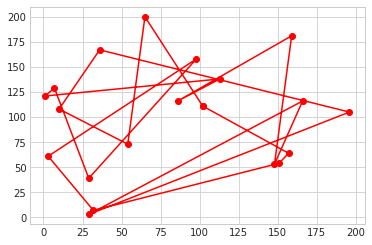

In [90]:
x, y = [], []
for key in final_list:
    x.append(final_child[key].x)
    y.append(final_child[key].y)
x.append(x[0])
y.append(y[0])
print(x)
print(y)

plt.plot(x, y, '-ok', color='red')

# Problem 2